# India_2023_Weather_Predictive_Analysis_Project

**Creator** : Anandan Raju\
**Source** : https://www.ncdc.noaa.gov/cdo-web/search

## Introduction

Weather forecasting is the use of science and technology to forecast atmospheric conditions for a certain place and period.

**Types of Weather Forecasting**

Short Range Forecasting | Medium Range Forecasting | Long-Range Forecasts

**Weather Forecasting Process**

A weather forecast is made up of three steps: observation and analysis, extrapolation to determine the state of the atmosphere in the future, and estimation of specific variables. One method of qualitative extrapolation is to conclude the weather features will continue to travel in the same direction as they have been.

> **Observation and Analysis**

1. While data-access policies differ by country, all of these reports are sent to regional and global centers through the World Meteorological Organization's (WMO) Global Telecommunications System (GTS).

2. The data is then compiled, redistributed in the GTS, and used in various numerical forecasting models. Typically, these numerical models begin with data collected between the hours of 0000 and 1200 UTC (7 A.M. and 7 P.M. Eastern Standard Time, respectively).

3. To aid the forecaster, the data is printed, mapped, and graphed in several ways. Furthermore, some "initialization" routines slightly change the data when it enters a prediction model only for that model.

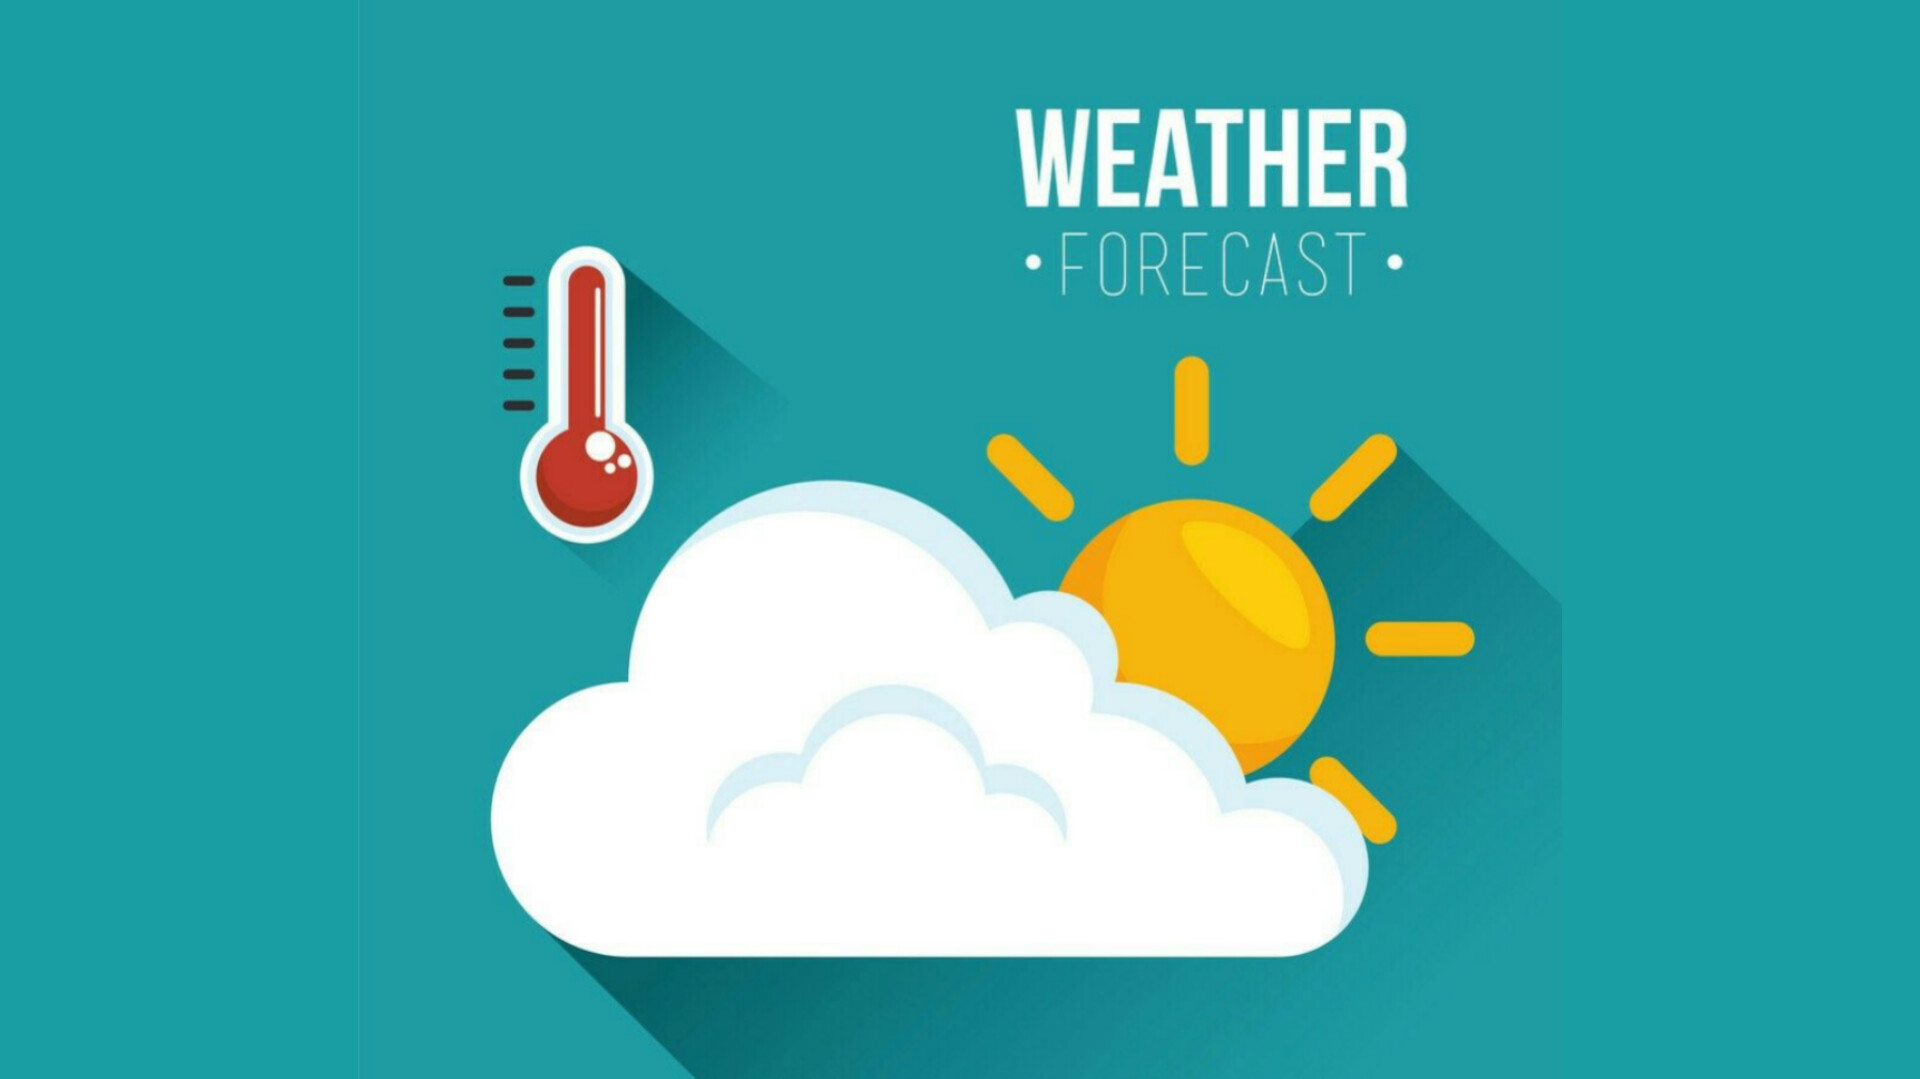

## Precipitation :

Precipitation is water that falls back to the surface of the earth upon condensing in the atmosphere. In other words, any form of water which falls, whether it is in liquid or frozen form, falls as precipitation only. Now that we are clear on what is precipitation, let us move on to the different types. You can consider heavy or light rain as precipitation and even snow, drizzle and hail.

Types of Precipitation : 

Precipitation plays a major part in the water cycle as it is the one which brings in the deposit of freshwater on the planet. It can be divided into three categories depending upon the form such as:

- Liquid water
- Ice
- Liquid water freezes when comes in contact with the surface

## Temperature :

Temperature, measure of hotness or coldness expressed in terms of any of several arbitrary scales and indicating the direction in which heat energy will spontaneously flow i.e., from a hotter body (one at a higher temperature) to a colder body (one at a lower temperature).

Three temperature scales are in general use today. 

- The Fahrenheit (°F) temperature scale is used in the United States and a few other English-speaking countries. 
- The Celsius (°C) temperature scale is standard in virtually all countries that have adopted the metric system of measurement, and it is widely used in the sciences. 
- The Kelvin (K) scale, an absolute temperature scale (obtained by shifting the Celsius scale by −273.15° so that absolute zero coincides with 0 K), is recognized as the international standard for scientific temperature measurement.

<a id="table"></a>
# Table of Contents

1. [Import Libraries & Install Packages](#import)
2. [Reading and Checking Dataset](#read)
3. [Exploratory Data Analysis](#eda)
4. [Checking for Missing Value](#check)
5. [Training ML Model](#train)
6. [Evaluate Model](#eva)
7. [Function to Make Prediction](#func)
8. [Addition of Rolling Means](#roll)
9. [Adding Monthly and Daily Averages](#add)
10. [Running Model Diagnostics](#run)
11. [GeoMap Creation](#geo)
12. [Creation of Pandas Profiling Report](#create)

<a id="import"></a>
# 1. Import Libraries & Install Packages
[Table of contents](#table)

In [1]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jupyter-datatables

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import folium

from sklearn.linear_model import Ridge
from geopy.geocoders import ArcGIS
from pandas_profiling import ProfileReport

from jupyter_datatables import init_datatables_mode

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# 2. Reading and Checking Dataset
[Table of contents](#table)

In [253]:
weather = pd.read_csv("India_Weather_2022.csv",index_col='DATE')

In [254]:
#from jupyter_datatables import init_datatables_mode
#init_datatables_mode()
#pd.read_csv("India_Weather_2022.csv")

In [313]:
weather = pd.read_csv("India_Weather_2022.csv",index_col='DATE')

In [314]:
weather.index.is_monotonic

False

In [315]:
weather.duplicated().sum()

5860

In [316]:
weather.head()

STATION             NAME  LATITUDE  LONGITUDE  ELEVATION  \
DATE                                                                       
01-01-2022  IN012212400       SANGLI, IN    16.850     74.600      549.0   
01-01-2022  IN017111200  BHUBANESWAR, IN    20.250     85.833       46.0   
01-01-2022  IN019040100       BARMER, IN    25.750     71.383      194.0   
01-01-2022  IN005010600    AHMADABAD, IN    23.067     72.633       55.0   
01-01-2022  IN005100400    PORBANDAR, IN    21.650     69.667        7.0   

            PRCP  TAVG  TMAX  TMIN  
DATE                                
01-01-2022   NaN    78  83.0  67.0  
01-01-2022   NaN    67   NaN   NaN  
01-01-2022   NaN    63   NaN  51.0  
01-01-2022   NaN    68   NaN   NaN  
01-01-2022   NaN    73   NaN  64.0

In [317]:
pd.Series(weather['NAME'].value_counts())

THIRUVANANTHAPURAM, IN    730
JAGDALPUR, IN             365
CUDDALORE, IN             365
SURAT, IN                 365
GOA PANJIM, IN            365
                         ... 
DARJEELING, IN             66
SILIGURI, IN               26
ALLAHABAD, IN              14
CHERRAPUNJI, IN             2
PARBHANI, IN                2
Name: NAME, Length: 136, dtype: int64

<a id="eda"></a>
# 3. Exploratory Data Analysis
[Table of contents](#table)

In [318]:
weather.describe().T

count        mean         std     min     25%      50%      75%  \
LATITUDE   46285.0   21.709457    5.981610   8.467  17.350   22.717   26.233   
LONGITUDE  46285.0   79.702591    6.227500  68.850  74.917   78.100   83.250   
ELEVATION  46285.0  300.275947  393.116580   3.000  38.000  177.000  399.000   
PRCP       14706.0    0.431367    0.875837   0.000   0.000    0.080    0.460   
TAVG       46285.0   79.039257   10.058903  31.000  74.000   81.000   86.000   
TMAX       32538.0   90.550065   10.057338  35.000  85.000   91.000   96.000   
TMIN       39625.0   68.648757   11.046868  22.000  62.000   72.000   77.000   

                max  
LATITUDE     34.083  
LONGITUDE    95.383  
ELEVATION  2311.000  
PRCP         14.250  
TAVG        110.000  
TMAX        119.000  
TMIN         93.000

array([[<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>],
       [<AxesSubplot:title={'center':'PRCP'}>,
        <AxesSubplot:title={'center':'TAVG'}>,
        <AxesSubplot:title={'center':'TMAX'}>],
       [<AxesSubplot:title={'center':'TMIN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

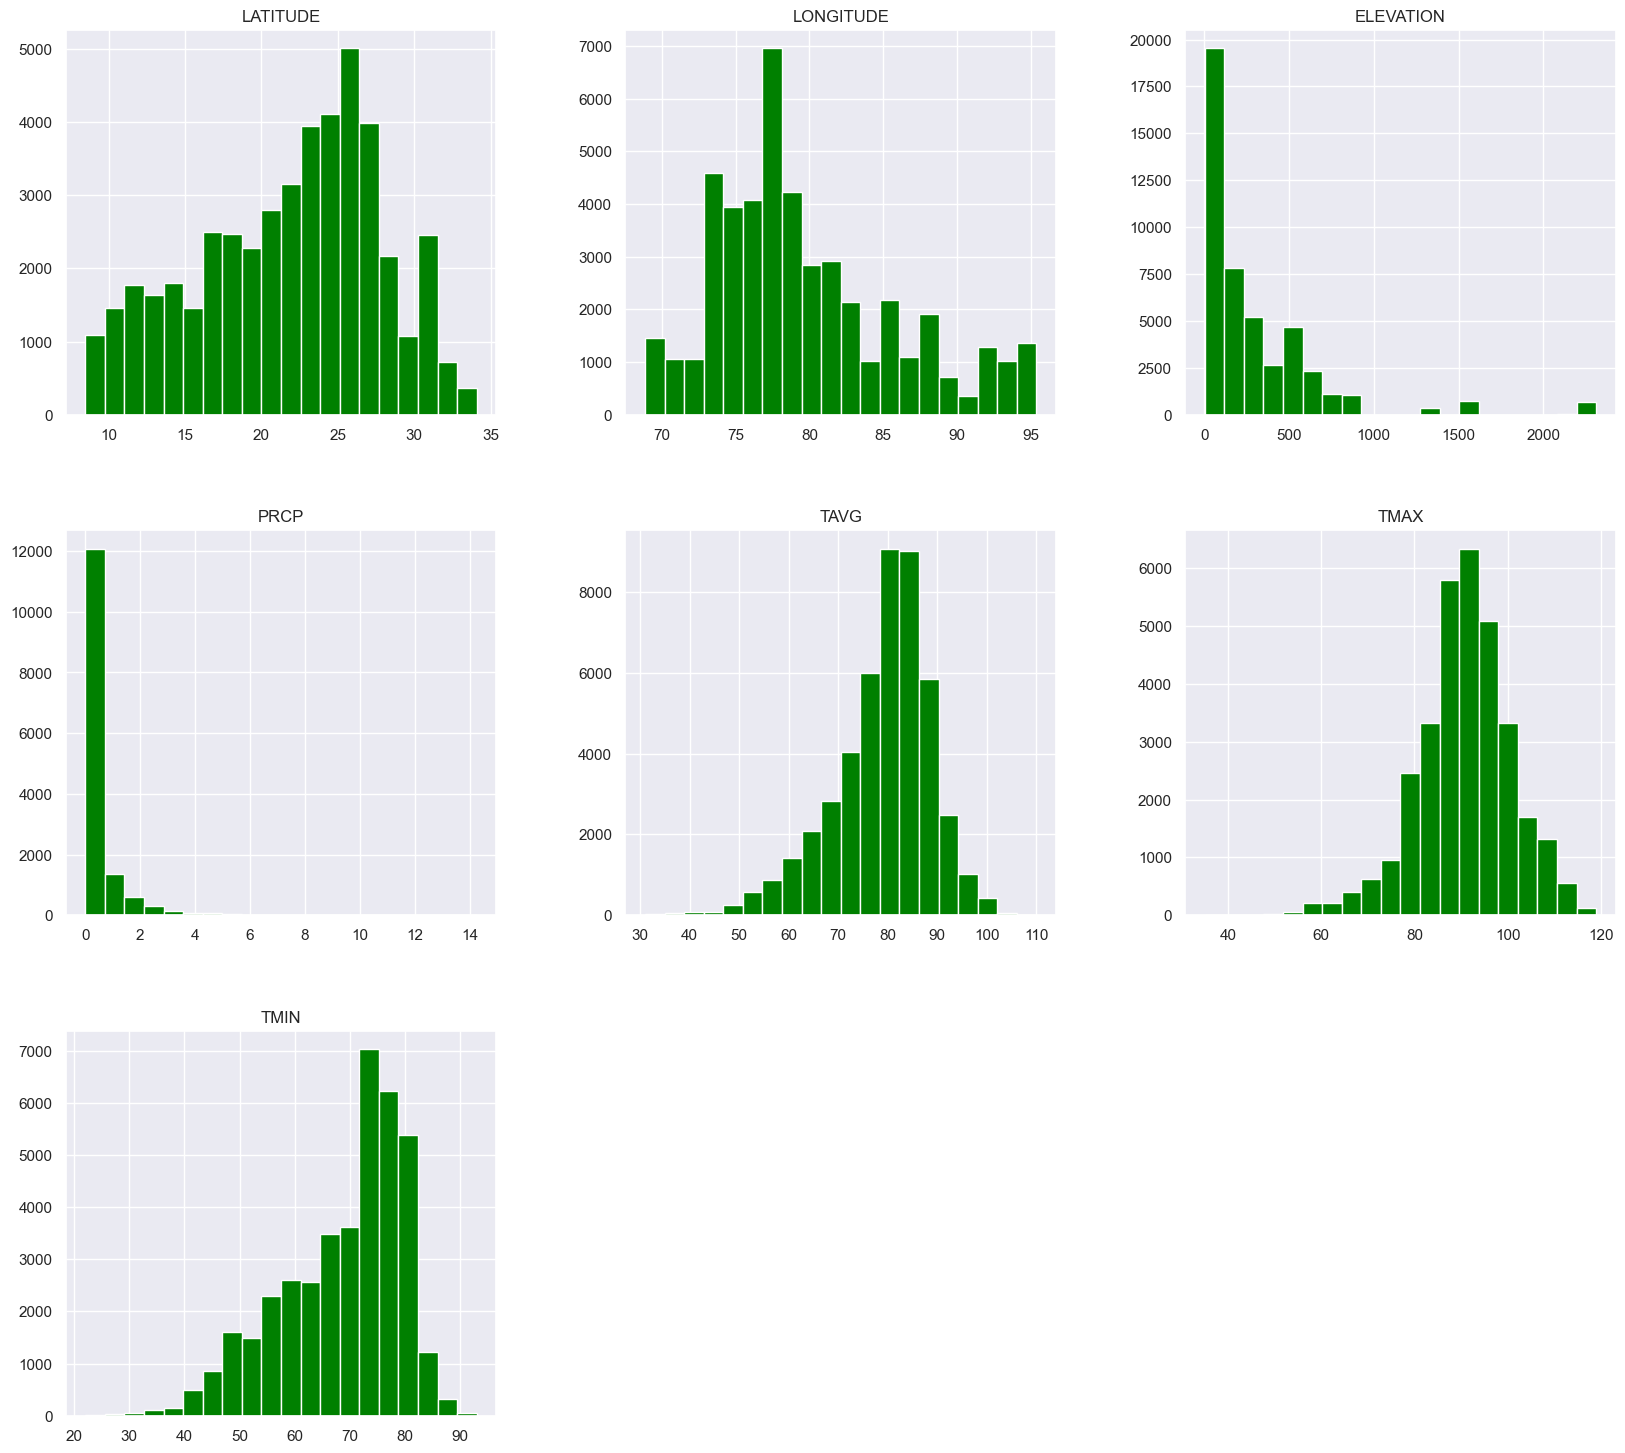

In [319]:
weather.hist(bins=20,figsize=(20,18),color='green')

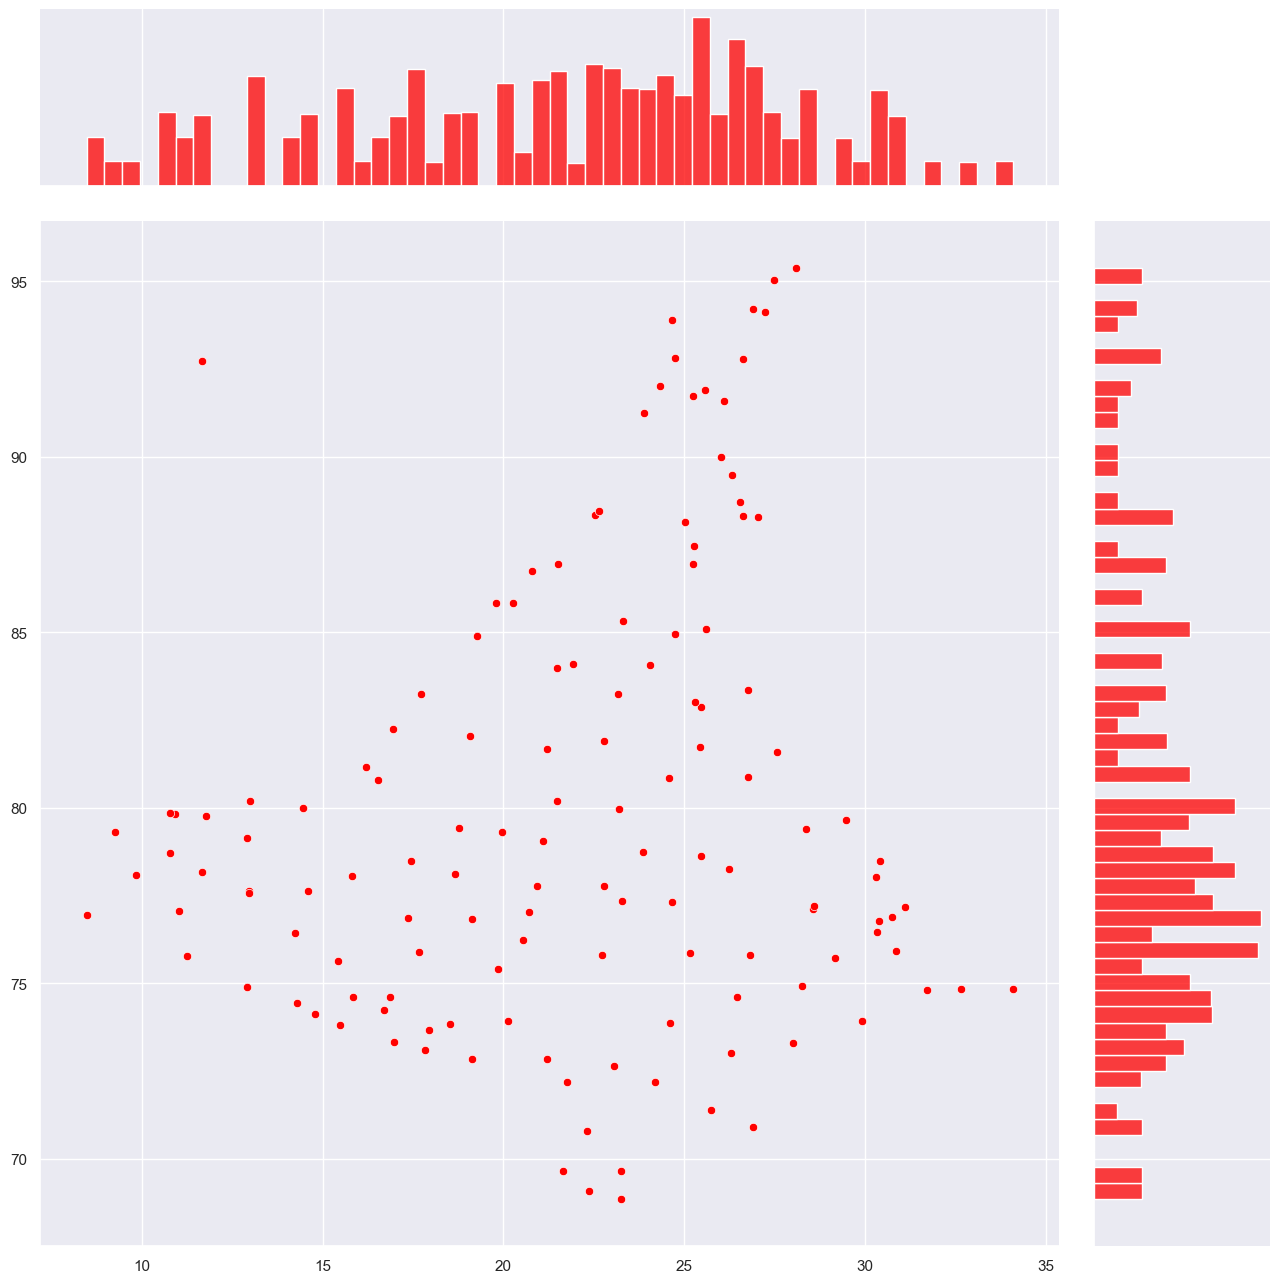

<Figure size 700x700 with 0 Axes>

In [320]:
sns.jointplot(x=weather.LATITUDE.values, y=weather.LONGITUDE.values, size=13,color='RED')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.figure(figsize=(7,7))
plt.show()

<AxesSubplot:xlabel='PRCP', ylabel='NAME'>

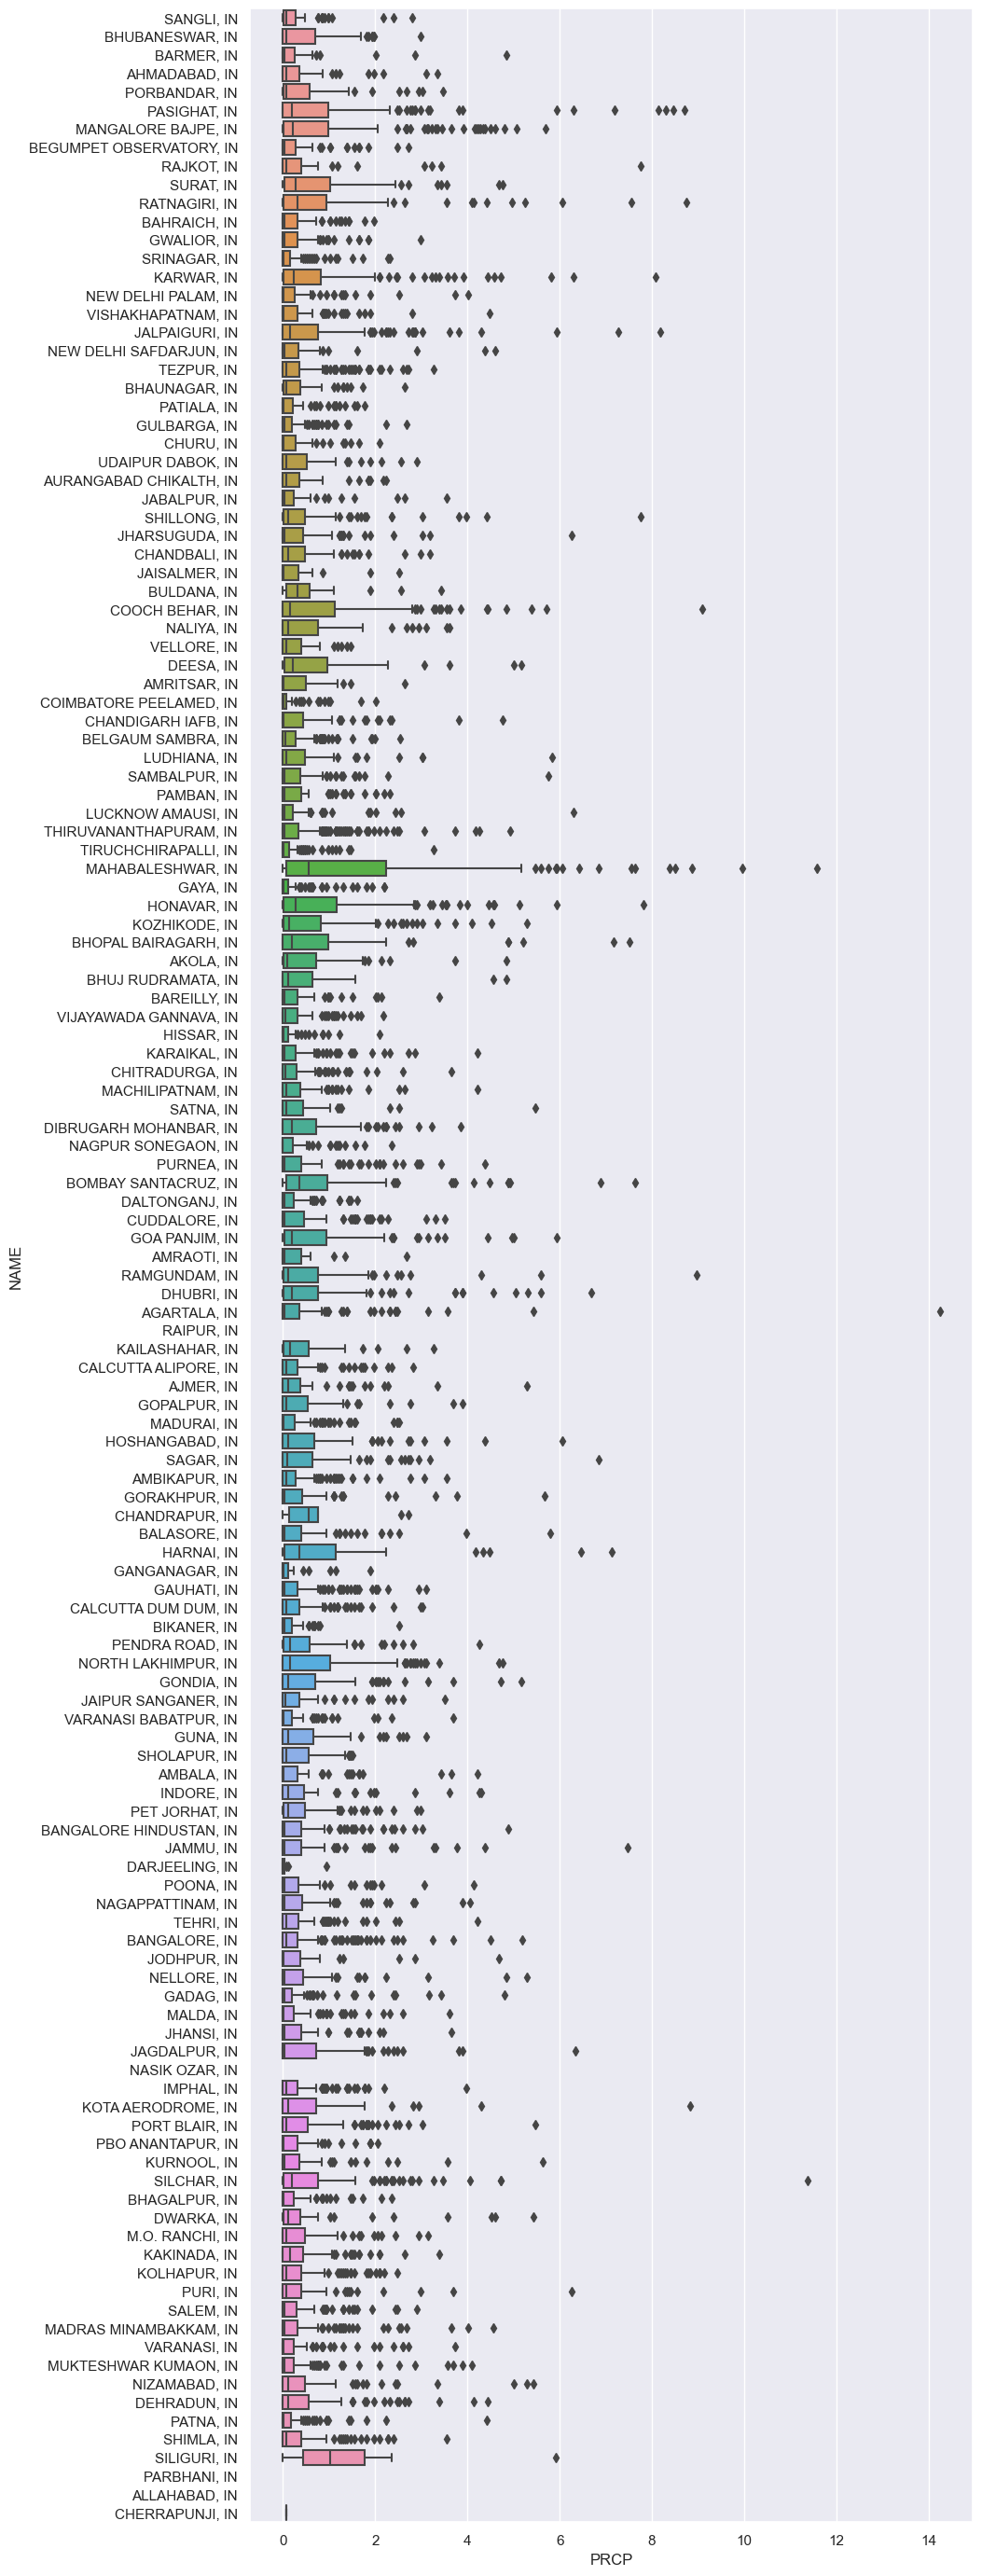

In [321]:
plt.figure(figsize=(10,35))
sns.boxplot(y='NAME',x='PRCP',data=weather[:])

<AxesSubplot:xlabel='TMAX', ylabel='NAME'>

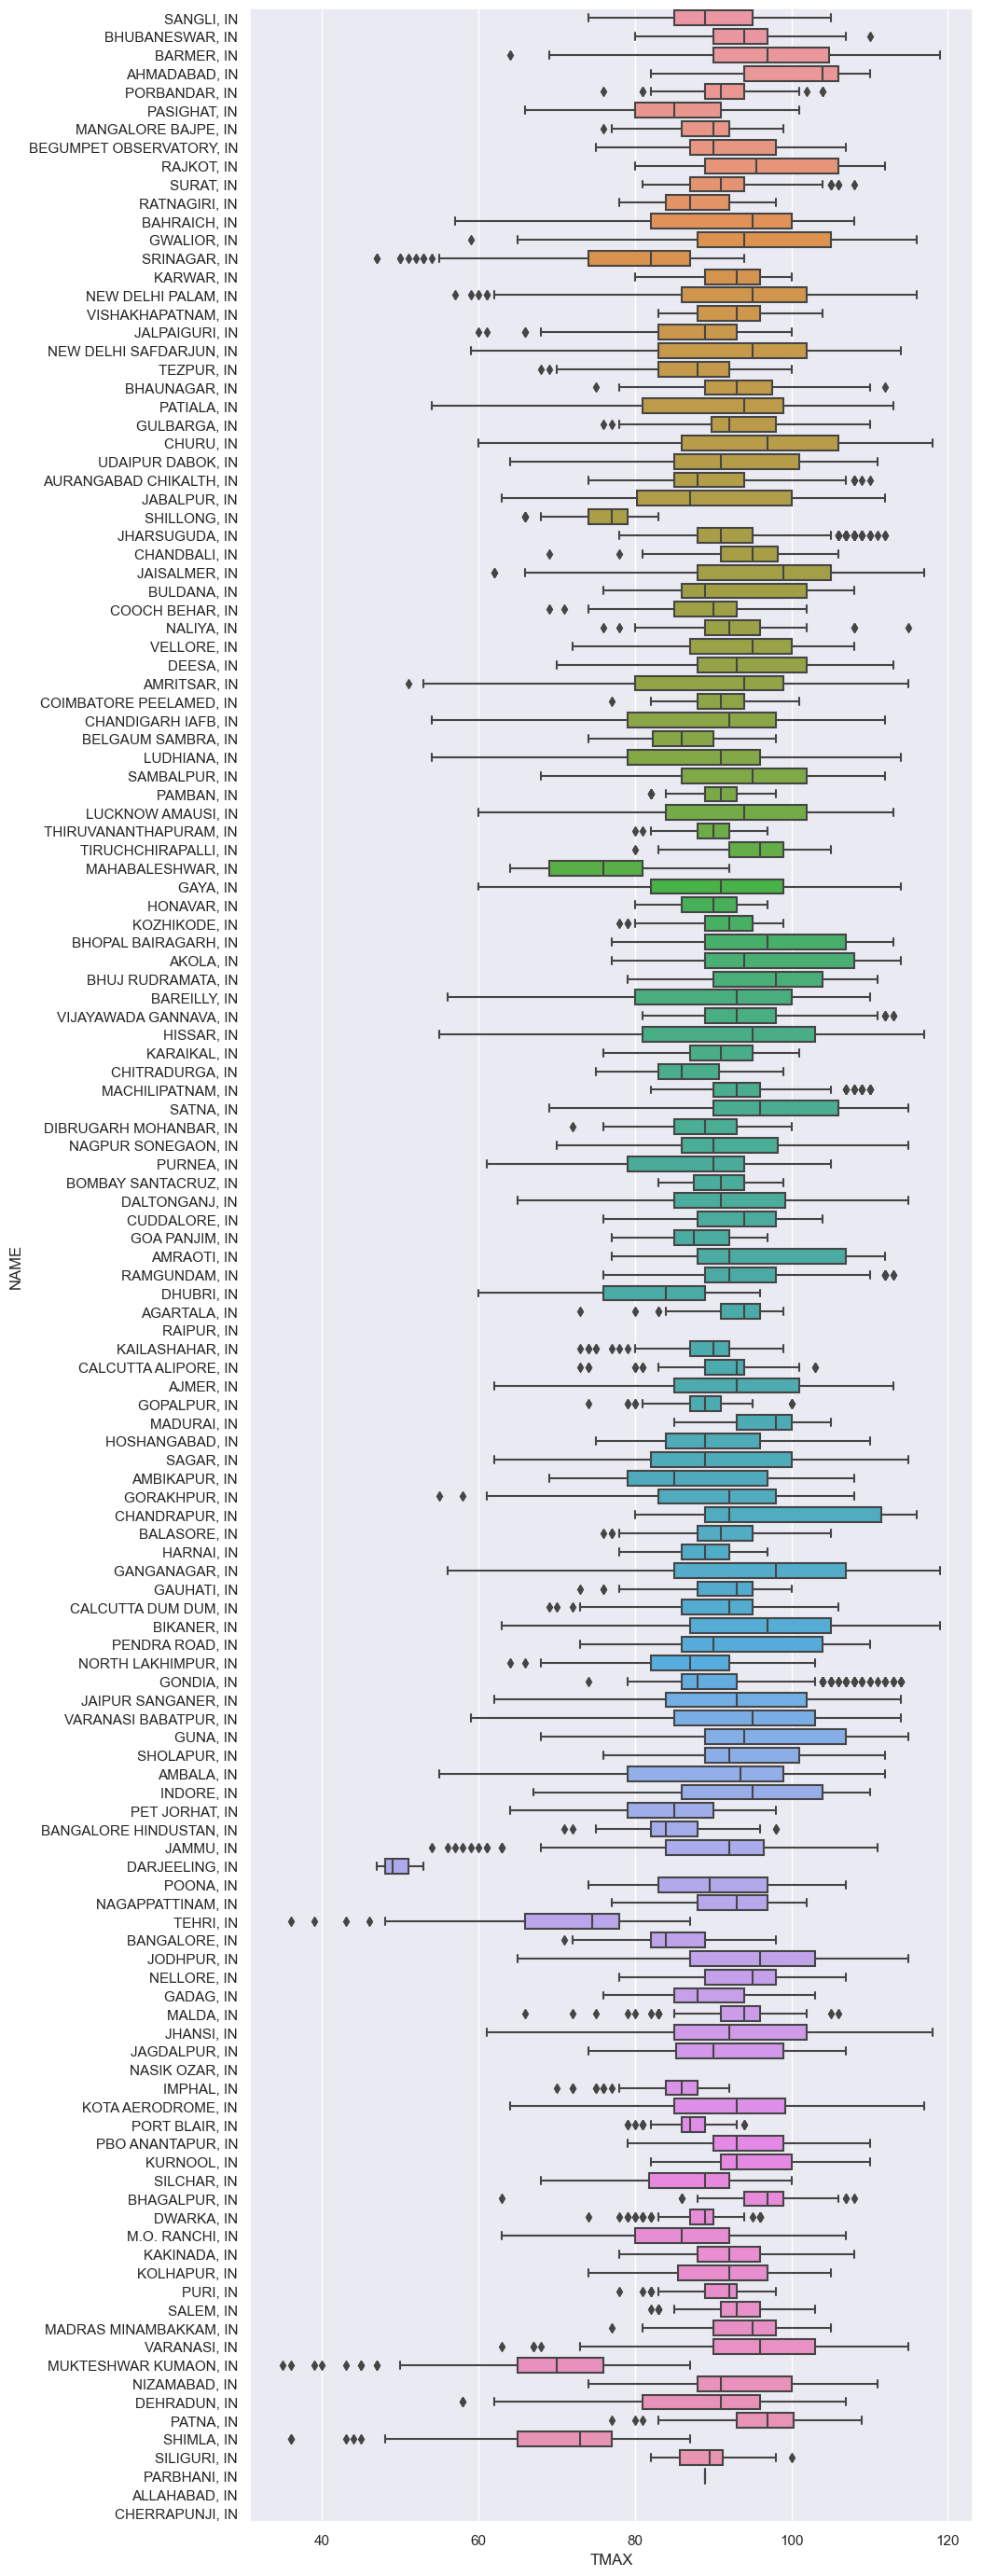

In [322]:
plt.figure(figsize=(10,35))
sns.boxplot(y='NAME',x='TMAX',data=weather[:])

<AxesSubplot:xlabel='TMIN', ylabel='NAME'>

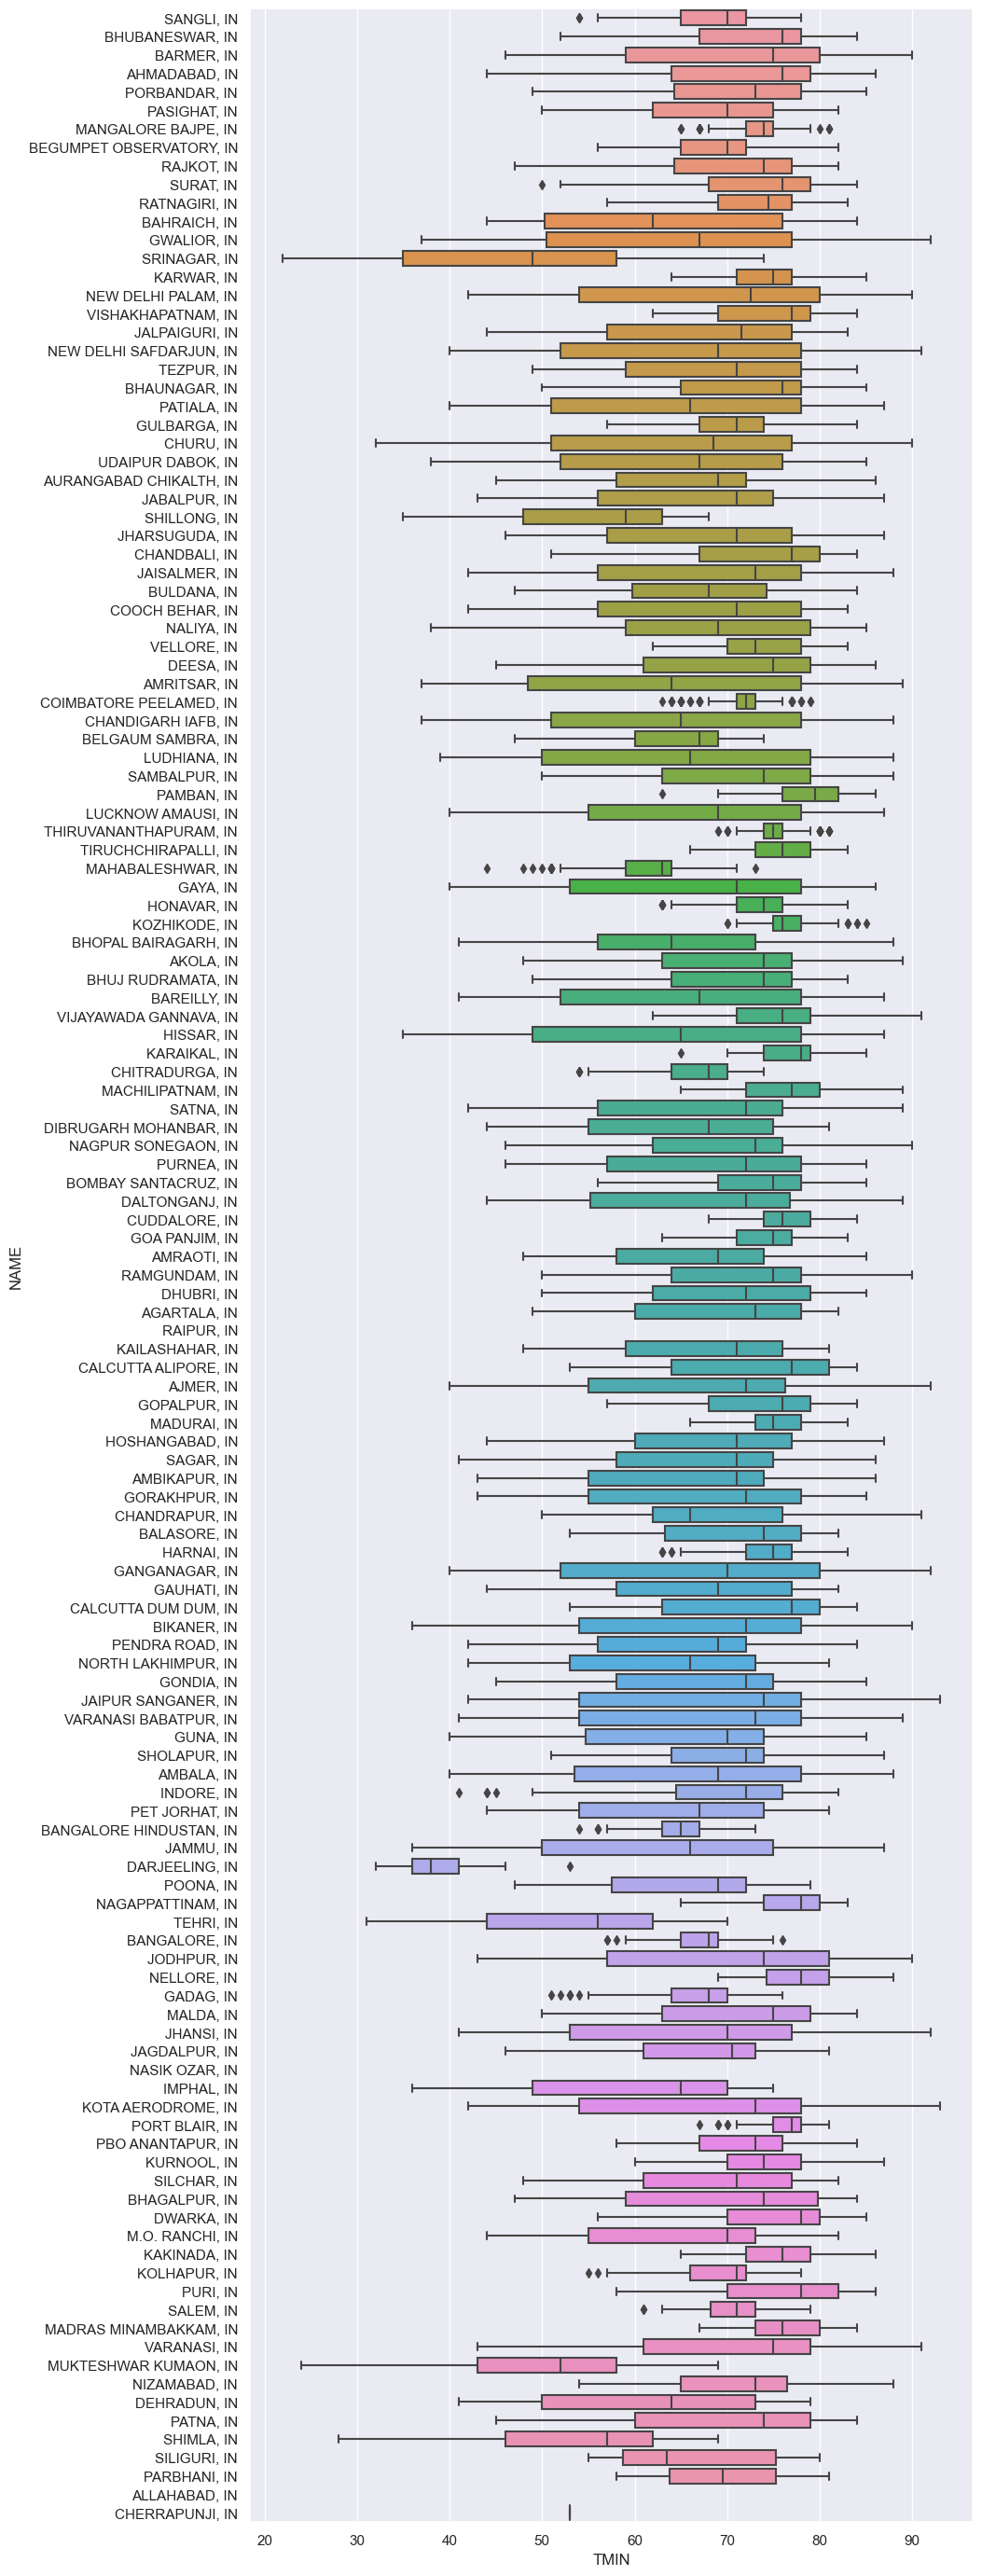

In [323]:
plt.figure(figsize=(10,35))
sns.boxplot(y='NAME',x='TMIN',data=weather[:])

In [324]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46285 entries, 01-01-2022 to 31-12-2022
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    46285 non-null  object 
 1   NAME       46285 non-null  object 
 2   LATITUDE   46285 non-null  float64
 3   LONGITUDE  46285 non-null  float64
 4   ELEVATION  46285 non-null  float64
 5   PRCP       14706 non-null  float64
 6   TAVG       46285 non-null  int64  
 7   TMAX       32538 non-null  float64
 8   TMIN       39625 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [325]:
print('Percentage of Null Values :')
weather.apply(pd.isnull).sum()/weather.shape[0]*100

Percentage of Null Values :


STATION       0.000000
NAME          0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
PRCP         68.227287
TAVG          0.000000
TMAX         29.700767
TMIN         14.389111
dtype: float64

In [326]:
weather1 = weather[["PRCP", "TMAX", "TMIN"]].copy()
weather1.columns = ['precip','temp_max','temp_min']

In [327]:
weather1.apply(pd.isnull).sum()/weather1.shape[0]*100

precip      68.227287
temp_max    29.700767
temp_min    14.389111
dtype: float64

In [328]:
weather1[pd.isnull(weather1['precip'])]

precip  temp_max  temp_min
DATE                                  
01-01-2022     NaN      83.0      67.0
01-01-2022     NaN       NaN       NaN
01-01-2022     NaN       NaN      51.0
01-01-2022     NaN       NaN       NaN
01-01-2022     NaN       NaN      64.0
...            ...       ...       ...
31-12-2022     NaN       NaN      72.0
31-12-2022     NaN      74.0      49.0
31-12-2022     NaN      92.0      61.0
31-12-2022     NaN       NaN      43.0
31-12-2022     NaN       NaN      50.0

[31579 rows x 3 columns]

In [329]:
weather1['precip'].value_counts()/weather1.shape[0]

0.00    0.101437
0.08    0.016290
0.04    0.016226
0.02    0.015426
0.12    0.012877
          ...   
5.63    0.000022
3.65    0.000022
4.33    0.000022
1.25    0.000022
1.20    0.000022
Name: precip, Length: 349, dtype: float64

In [330]:
weather1.loc['10-10-2022':'20-10-2022',:]

precip  temp_max  temp_min
DATE                                  
10-10-2022     NaN      79.0      73.0
10-10-2022    0.16      90.0      74.0
10-10-2022     NaN       NaN      76.0
10-10-2022     NaN       NaN      78.0
10-10-2022     NaN      94.0       NaN
...            ...       ...       ...
20-10-2022     NaN      93.0      66.0
20-10-2022     NaN      67.0      45.0
20-10-2022     NaN      91.0      75.0
20-10-2022     NaN      85.0       NaN
20-10-2022     NaN       NaN      72.0

[1381 rows x 3 columns]

In [331]:
weather1['precip'] = weather1['precip'].fillna(0)

In [332]:
weather1.apply(pd.isnull).sum()

precip          0
temp_max    13747
temp_min     6660
dtype: int64

In [333]:
weather1[pd.isnull(weather1['temp_min'])]

precip  temp_max  temp_min
DATE                                  
01-01-2022     0.0       NaN       NaN
01-01-2022     0.0       NaN       NaN
01-01-2022     0.0      82.0       NaN
01-01-2022     0.0       NaN       NaN
01-01-2022     0.0      86.0       NaN
...            ...       ...       ...
31-12-2022     0.0       NaN       NaN
31-12-2022     0.0       NaN       NaN
31-12-2022     0.0      84.0       NaN
31-12-2022     0.0       NaN       NaN
31-12-2022     0.0      81.0       NaN

[6660 rows x 3 columns]

In [334]:
weather1.loc['10-10-2022':'20-10-2022']

precip  temp_max  temp_min
DATE                                  
10-10-2022    0.00      79.0      73.0
10-10-2022    0.16      90.0      74.0
10-10-2022    0.00       NaN      76.0
10-10-2022    0.00       NaN      78.0
10-10-2022    0.00      94.0       NaN
...            ...       ...       ...
20-10-2022    0.00      93.0      66.0
20-10-2022    0.00      67.0      45.0
20-10-2022    0.00      91.0      75.0
20-10-2022    0.00      85.0       NaN
20-10-2022    0.00       NaN      72.0

[1381 rows x 3 columns]

In [335]:
weather1 = weather1.fillna(method='ffill')

In [336]:
weather1.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

<a id="check"></a>
# 4. Checking for Missing Value 
[Table of contents](#table)

In [337]:
weather1.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [338]:
weather1.index

Index(['01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022',
       '01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022', '01-01-2022',
       ...
       '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022',
       '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022', '31-12-2022'],
      dtype='object', name='DATE', length=46285)

In [339]:
weather1.index = pd.to_datetime(weather1.index)
weather1.index

DatetimeIndex(['2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01',
               ...
               '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
               '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
               '2022-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=46285, freq=None)

In [340]:
weather1.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=46285)

In [341]:
weather1.apply(lambda x: (x <= -1).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [342]:
weather1.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

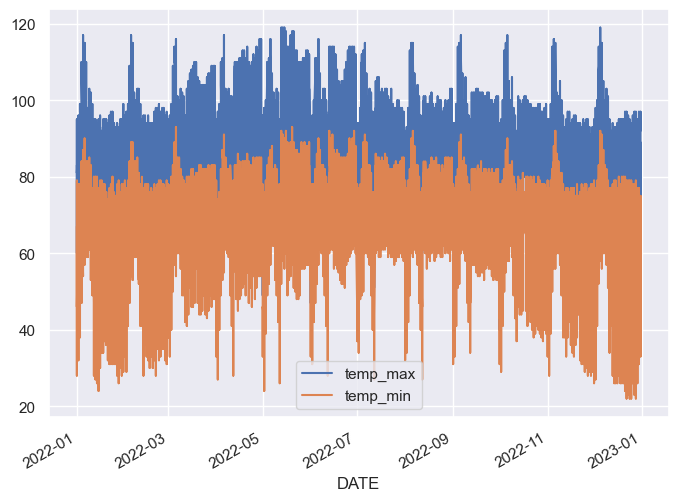

In [343]:
weather1[['temp_max','temp_min']].plot()

<AxesSubplot:xlabel='DATE'>

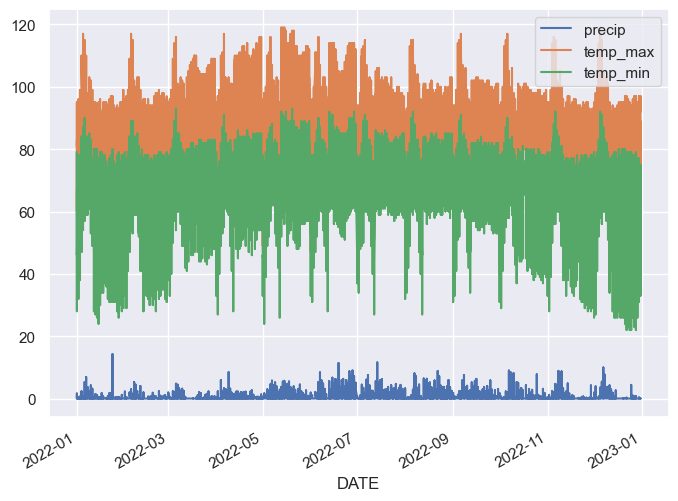

In [344]:
weather1[['precip','temp_max','temp_min']].plot()

In [345]:
weather1.index.year.value_counts()

2022    46285
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

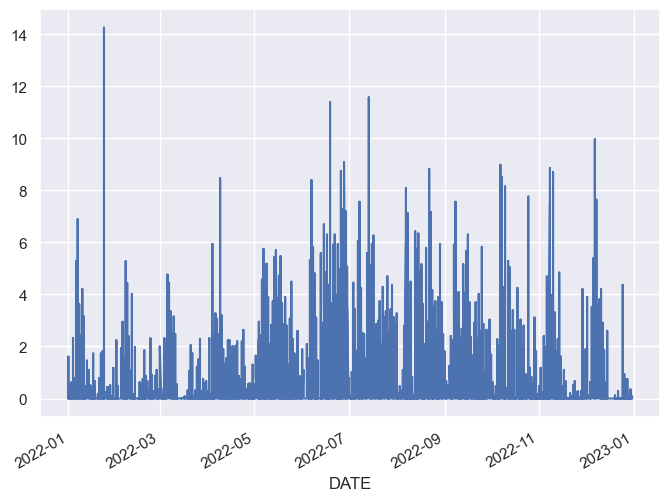

In [346]:
weather1['precip'].plot()

In [347]:
weather1.groupby(weather1.index).apply(lambda x: x["precip"].sum())

DATE
2022-01-01    6.45
2022-01-02    0.59
2022-01-03    0.83
2022-01-04    7.87
2022-01-05    3.54
              ... 
2022-12-27    4.61
2022-12-28    1.83
2022-12-29    0.06
2022-12-30    0.69
2022-12-31    0.08
Length: 365, dtype: float64

<AxesSubplot:xlabel='DATE'>

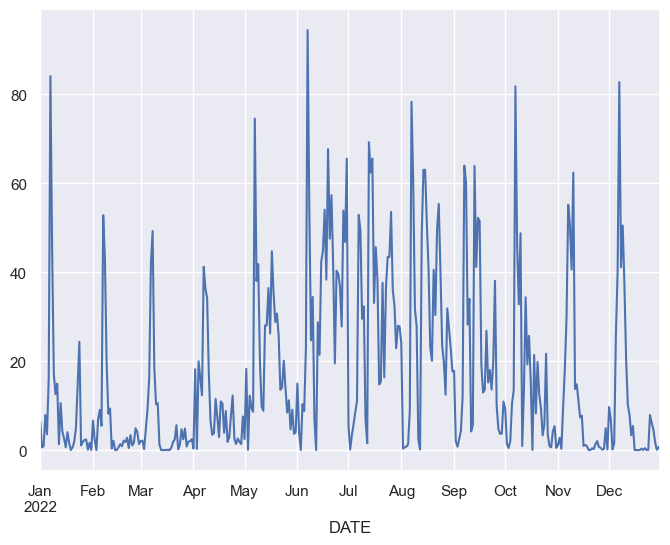

In [348]:
weather1.groupby(weather1.index).apply(lambda x: x["precip"].sum()).plot()

<AxesSubplot:xlabel='DATE'>

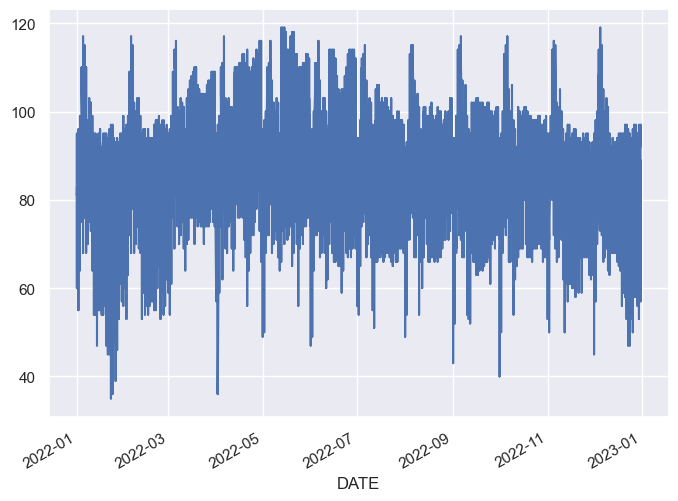

In [349]:
weather1['temp_max'].plot()

<AxesSubplot:xlabel='DATE'>

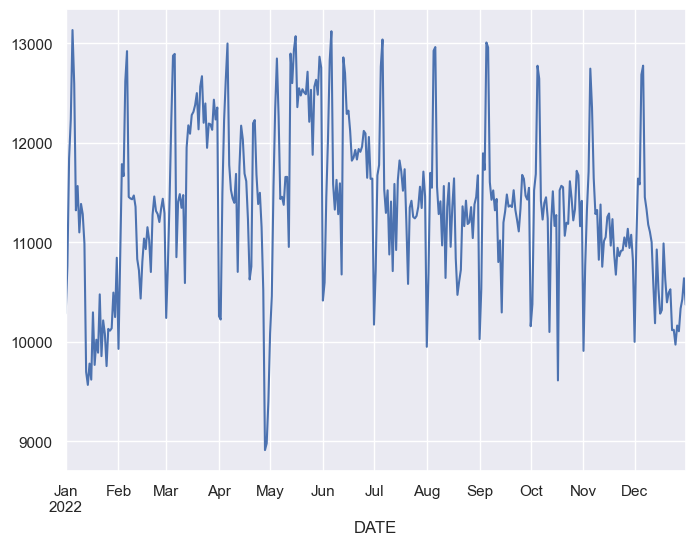

In [350]:
weather1.groupby(weather1.index).apply(lambda x: x["temp_max"].sum()).plot()

<AxesSubplot:xlabel='DATE'>

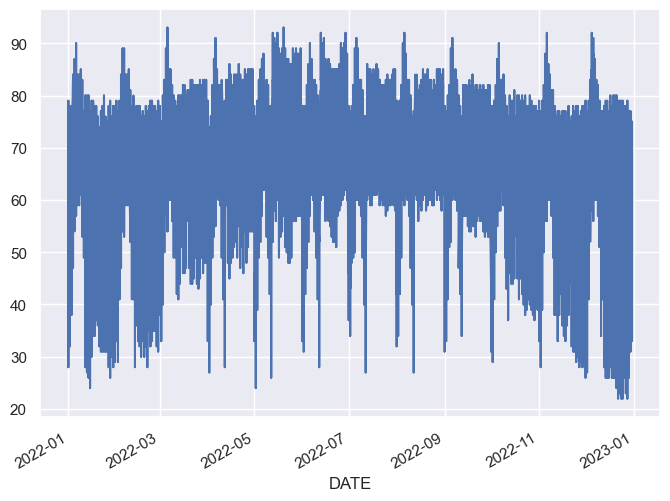

In [351]:
weather1['temp_min'].plot()

<AxesSubplot:xlabel='DATE'>

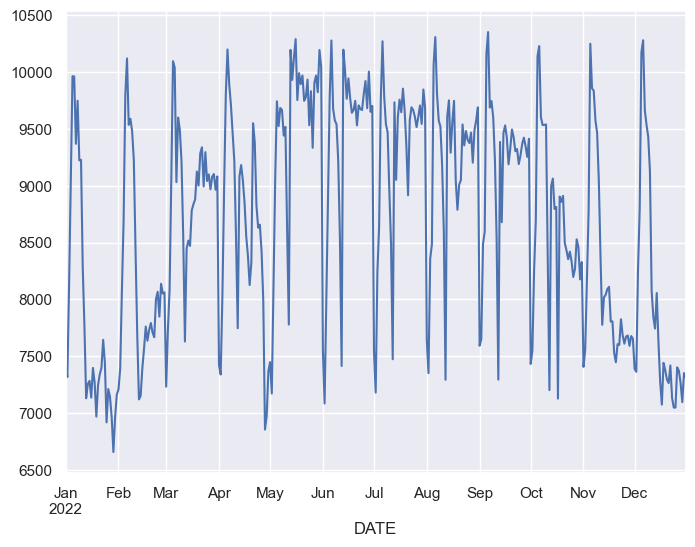

In [352]:
weather1.groupby(weather1.index).apply(lambda x: x["temp_min"].sum()).plot()

<a id="train"></a>
# 5. Training ML Model
[Table of contents](#table)

In [353]:
weather1['target'] = weather1.shift(-1)['temp_max']

In [354]:
weather1

precip  temp_max  temp_min  target
DATE                                          
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0
2022-12-31     0.0      92.0      50.0     NaN

[46285 rows x 4 columns]

In [355]:
weather1 = weather1.iloc[:-1,:].copy()

In [356]:
weather1

precip  temp_max  temp_min  target
DATE                                          
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      67.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      51.0    83.0
2022-01-01     0.0      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-12-31     0.0      90.0      72.0    74.0
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0

[46284 rows x 4 columns]

In [357]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)

In [358]:
predictors=['precip','temp_max','temp_min']

In [359]:
train = weather1.loc[:'31-10-2022']
test = weather1.loc['01-11-2022':]

In [360]:
train

precip  temp_max  temp_min  target
DATE                                          
2022-01-01    0.00      83.0      67.0    83.0
2022-01-01    0.00      83.0      67.0    83.0
2022-01-01    0.00      83.0      51.0    83.0
2022-01-01    0.00      83.0      51.0    83.0
2022-01-01    0.00      83.0      64.0    83.0
...            ...       ...       ...     ...
2022-10-12    4.57      78.0      71.0    65.0
2022-10-12    0.00      65.0      43.0    85.0
2022-10-12    0.00      85.0      66.0    79.0
2022-10-12    0.00      79.0      49.0    79.0
2022-10-12    0.00      79.0      51.0    85.0

[38477 rows x 4 columns]

In [361]:
test

precip  temp_max  temp_min  target
DATE                                          
2022-01-11     0.0      88.0      62.0    91.0
2022-01-11     0.0      91.0      69.0    91.0
2022-01-11     0.0      91.0      69.0    91.0
2022-01-11     0.0      91.0      63.0    91.0
2022-01-11     0.0      91.0      65.0    87.0
...            ...       ...       ...     ...
2022-12-31     0.0      90.0      72.0    74.0
2022-12-31     0.0      74.0      49.0    57.0
2022-12-31     0.0      57.0      33.0    92.0
2022-12-31     0.0      92.0      61.0    92.0
2022-12-31     0.0      92.0      43.0    92.0

[7851 rows x 4 columns]

In [362]:
reg.fit(train[predictors],train['target'])

Ridge(alpha=0.1)

In [363]:
predictions = reg.predict(test[predictors])

In [364]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test['target'],predictions)

54.672827169984494

<a id="eva"></a>
# 6. Evaluate Model
[Table of contents](#table)

In [365]:
combined = pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
combined.columns = ['actual','predictions']

In [366]:
combined

actual  predictions
DATE                           
2022-01-11    91.0    88.033496
2022-01-11    91.0    90.420116
2022-01-11    91.0    90.420116
2022-01-11    91.0    89.525478
2022-01-11    87.0    89.823691
...            ...          ...
2022-12-31    74.0    90.419810
2022-12-31    57.0    79.828360
2022-12-31    92.0    69.833028
2022-12-31    92.0    89.674891
2022-12-31    92.0    86.990978

[7851 rows x 2 columns]

<AxesSubplot:xlabel='DATE'>

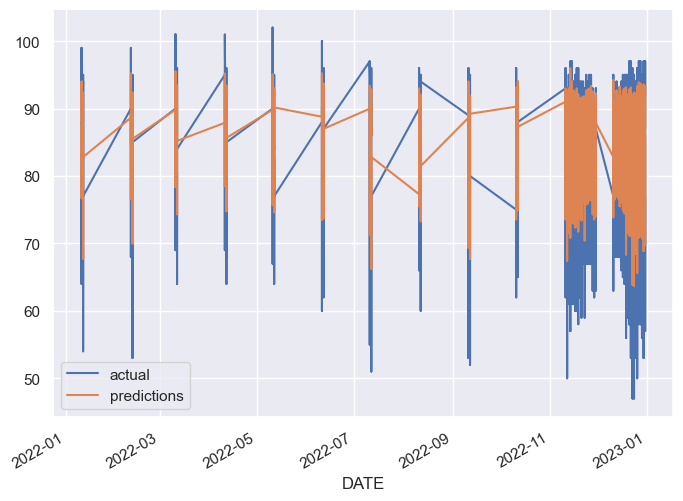

In [367]:
combined.plot()

In [368]:
reg.coef_

array([1.08250867, 0.44762535, 0.14910628])

<a id="func"></a>
# 7. Function to Make Prediction
[Table of contents](#table)

In [369]:
def create_predictions(predictors,weather1,reg):
    train = weather1.loc[:'31-10-2022']
    test = weather1.loc['01-11-2022':]
    
    reg.fit(train[predictors],train["target"])
    predictions = reg.predict(test[predictors])
    
    error = mean_squared_error(test['target'],predictions)
    
    combined = pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)
    combined.columns = ['actual','predictions']
    
    return error, combined

<a id="add"></a>
# 8. Addition of Rolling Means
[Table of contents](#table)

In [370]:
weather1['month_max'] = weather1['temp_max'].rolling(30).mean()
weather1['month_day_max'] = weather1['month_max'] / weather1['temp_max']
weather1['max_min'] = weather1['temp_max'] / weather1['temp_min']

In [371]:
predictors = ['precip','temp_max','temp_min','month_day_max','max_min']

In [372]:
weather1 = weather1.iloc[30:,:].copy()

In [373]:
error,combined = create_predictions(predictors,weather1,reg)
error

42.93966674913928

<AxesSubplot:xlabel='DATE'>

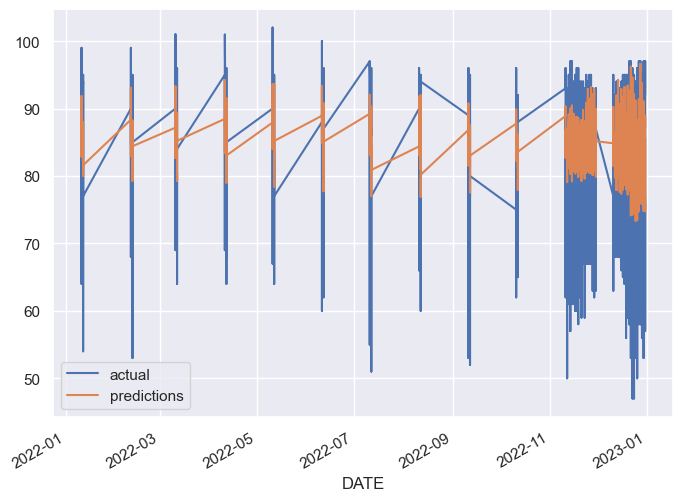

In [374]:
combined.plot()

<a id="add"></a>
# 9. Adding Monthly and Daily Averages
[Table of contents](#table)

In [375]:
weather1['monthly_avg'] = weather1['temp_max'].groupby(weather1.index.month).apply(lambda x:x.expanding(1).mean())
weather1["day_of_year_avg"] = weather1["temp_max"].groupby(weather1.index.dayofyear).apply(lambda x: x.expanding(1).mean())

In [376]:
weather1

precip  temp_max  temp_min  target  month_max  month_day_max  \
DATE                                                                       
2022-01-01    0.00      79.0      47.0    79.0  78.266667       0.990717   
2022-01-01    0.00      79.0      59.0    79.0  78.133333       0.989030   
2022-01-01    0.00      79.0      49.0    79.0  78.000000       0.987342   
2022-01-01    0.00      79.0      50.0    82.0  77.866667       0.985654   
2022-01-01    1.18      82.0      69.0    80.0  77.833333       0.949187   
...            ...       ...       ...     ...        ...            ...   
2022-12-31    0.00      90.0      72.0    74.0  80.233333       0.891481   
2022-12-31    0.00      74.0      49.0    57.0  80.533333       1.088288   
2022-12-31    0.00      57.0      33.0    92.0  80.266667       1.408187   
2022-12-31    0.00      92.0      61.0    92.0  80.933333       0.879710   
2022-12-31    0.00      92.0      43.0    92.0  81.600000       0.886957   

             max_min  monthly_avg  day_of_year_avg  
DATE                                                
2022-01-01  1.680851    79.000000        79.000000  
2022-01-01  1.338983    79.000000        79.000000  
2022-01-01  1.612245    79.000000        79.000000  
2022-01-01  1.580000    79.000000        79.000000  
2022-01-01  1.188406    79.600000        79.600000  
...              ...          ...              ...  
2022-12-31  1.250000    84.555527        81.032520  
2022-12-31  1.510204    84.552852        80.975806  
2022-12-31  1.727273    84.545869        80.784000  
2022-12-31  1.508197    84.547758        80.873016  
2022-12-31  2.139535    84.549645        80.960630  

[46254 rows x 9 columns]

In [377]:
predictors = ['precip','temp_max','temp_min','month_day_max','max_min','monthly_avg','day_of_year_avg']

In [378]:
error, combined = create_predictions(predictors, weather1, reg)
error

43.02866313875156

<a id="run"></a>
# 10. Running Model Diagnostics
[Table of contents](#table)

In [379]:
reg.coef_

array([0.51893248, 0.05448061, 0.23283488, 1.00696684, 9.90829537,
       0.0946297 , 0.71411616])

In [380]:
weather1.corr()["target"]

precip             0.027076
temp_max           0.541767
temp_min           0.442342
target             1.000000
month_max          0.633527
month_day_max     -0.171712
max_min           -0.100622
monthly_avg        0.423043
day_of_year_avg    0.639934
Name: target, dtype: float64

In [381]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [382]:
combined.sort_values("diff", ascending=False).head(10)

actual  predictions       diff
DATE                                      
2022-12-23    47.0    83.787608  36.787608
2022-07-11    55.0    90.279436  35.279436
2022-09-11    53.0    87.540479  34.540479
2022-07-12    51.0    85.404921  34.404921
2022-11-12    50.0    83.614006  33.614006
2022-12-24    47.0    80.369060  33.369060
2022-12-26    50.0    82.229498  32.229498
2022-09-12    52.0    84.050362  32.050362
2022-12-28    58.0    89.455373  31.455373
2022-12-30    53.0    84.305686  31.305686

<AxesSubplot:>

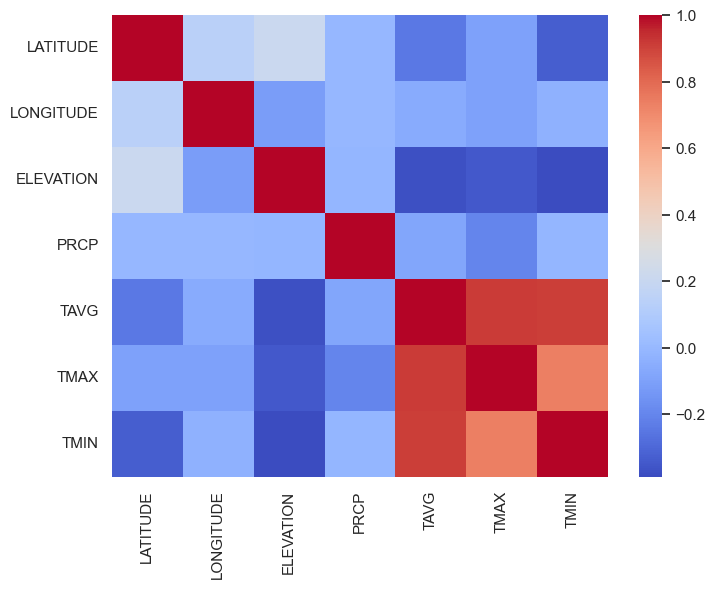

In [383]:
sns.heatmap(weather.corr(),cmap='coolwarm')

In [384]:
submission = pd.DataFrame(combined)
submission.to_csv("Submission.csv")
print("Output of 'India Weather Predicted Model Data' is Converted into CSV file")

Output of 'India Weather Predicted Model Data' is Converted into CSV file


<a id="geo"></a>
# 11. GeoMap Creation
[Table of contents](#table)

In [388]:
from geopy.geocoders import ArcGIS
import folium

In [386]:
nom=ArcGIS()

In [93]:
a_list1 = weather[['NAME','LATITUDE','LONGITUDE']].values.tolist()

In [94]:
a_list = a_list1[:100]
a_list

[['SANGLI, IN', 16.85, 74.6],
 ['BHUBANESWAR, IN', 20.25, 85.833],
 ['BARMER, IN', 25.75, 71.383],
 ['AHMADABAD, IN', 23.066999999999997, 72.633],
 ['PORBANDAR, IN', 21.65, 69.667],
 ['PASIGHAT, IN', 28.1, 95.383],
 ['MANGALORE BAJPE, IN', 12.917, 74.883],
 ['BEGUMPET OBSERVATORY, IN', 17.45, 78.47],
 ['RAJKOT, IN', 22.3, 70.783],
 ['SURAT, IN', 21.2, 72.833],
 ['RATNAGIRI, IN', 16.983, 73.333],
 ['BAHRAICH, IN', 27.566999999999997, 81.6],
 ['GWALIOR, IN', 26.233, 78.25],
 ['SRINAGAR, IN', 34.083, 74.833],
 ['KARWAR, IN', 14.783, 74.133],
 ['NEW DELHI PALAM, IN', 28.566999999999997, 77.117],
 ['VISHAKHAPATNAM, IN', 17.717, 83.23299999999999],
 ['JALPAIGURI, IN', 26.533, 88.71700000000001],
 ['NEW DELHI SAFDARJUN, IN', 28.583000000000002, 77.2],
 ['TEZPUR, IN', 26.616999999999997, 92.78299999999999],
 ['BHAUNAGAR, IN', 21.75, 72.2],
 ['PATIALA, IN', 30.333000000000002, 76.467],
 ['GULBARGA, IN', 17.35, 76.85],
 ['CHURU, IN', 28.25, 74.917],
 ['UDAIPUR DABOK, IN', 24.616999999999997, 73.

In [95]:
weather_map = folium.Map(location=[26.816999999999997,75.8])
fg = folium.FeatureGroup(name='weather')

for i in a_list:
    fg.add_child(folium.Marker(location = [i[1],i[2]],popup=i[0],icon=folium.Icon(color='red'),icon_size=0.5))
weather_map.add_child(fg)

In [96]:
weather_map.save('India Weather Location.html')

<a id="create"></a>
# 12. Creation of Pandas Profiling Report
[Table of contents](#table)

In [97]:
from pandas_profiling import ProfileReport

profile = ProfileReport(weather, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [98]:
profile.to_file("India 2022 Weather Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]